In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [3]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns
df.head()

No. of Rows : 891
No. of Columns : 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']}

In [5]:
df.duplicated().sum()

0

In [6]:
df.isin([' ','?','-','null','NA']).sum().any()

False

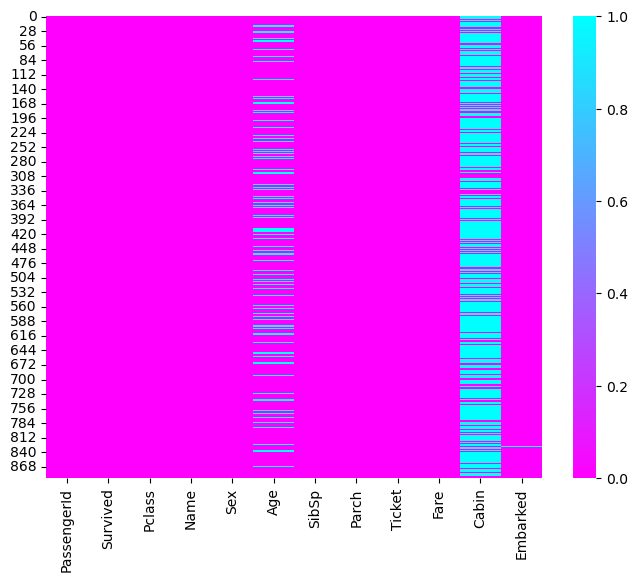

In [7]:
plt.figure(figsize = (8,6))
sns.heatmap(df.isnull(),cmap = 'cool_r')
plt.show()

In [8]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

             Missing Values  % Missing data
Cabin                   687       77.104377
Age                     177       19.865320
Embarked                  2        0.224467
PassengerId               0        0.000000
Survived                  0        0.000000
Pclass                    0        0.000000
Name                      0        0.000000
Sex                       0        0.000000
SibSp                     0        0.000000
Parch                     0        0.000000
Ticket                    0        0.000000
Fare                      0        0.000000


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.describe(include= object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
df.drop(columns=['Cabin'],inplace = True)

In [13]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

TypeError: countplot() got multiple values for argument 'data'

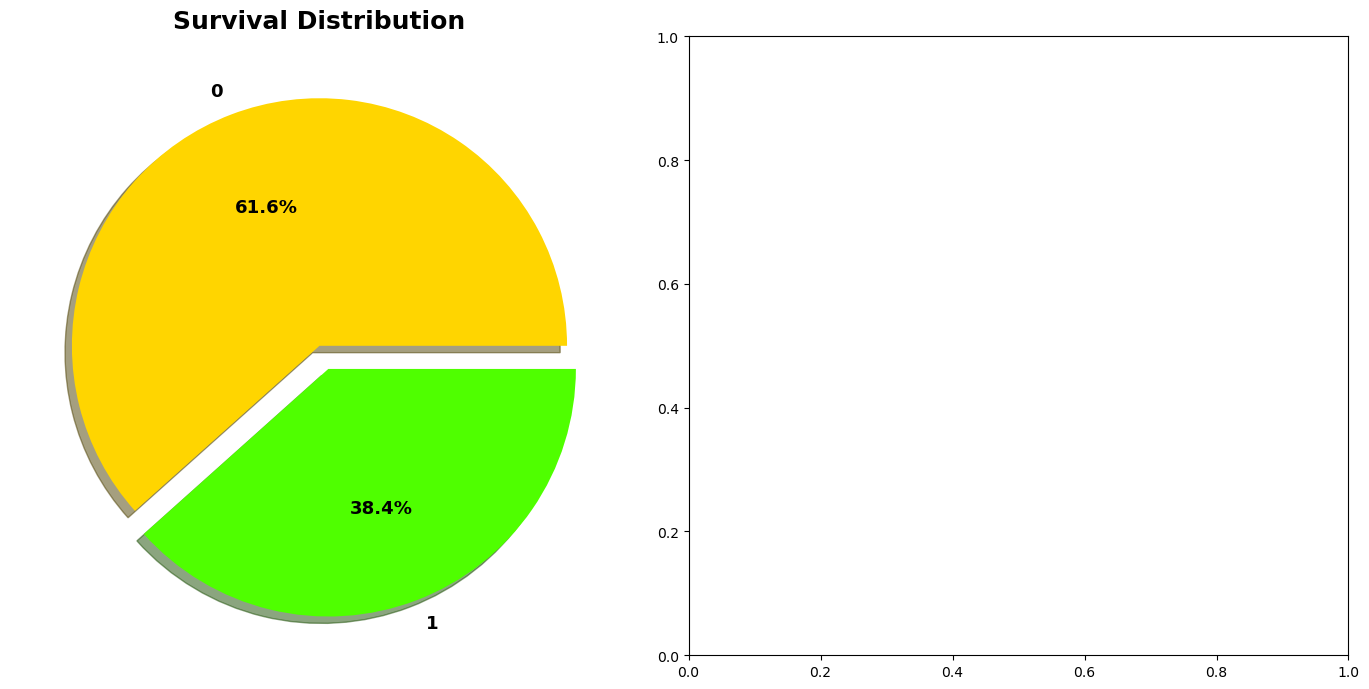

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams["figure.autolayout"] = True


sns.set_palette('hsv')


f, ax = plt.subplots(1, 2, figsize=(14, 7))


df['Survived'].value_counts().plot.pie(explode=[0, 0.1], textprops={'fontsize': 13, 'fontweight': 'bold'},
                                       autopct='%2.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survival Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylabel('')


sns.countplot('Survived', data=df, ax=ax[1])
ax[1].set_title('Survival Count', fontsize=18, fontweight='bold')
ax[1].set_xlabel("Survival Category", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Survival Count", fontsize=18, fontweight='bold')


plt.xticks(fontsize=18, fontweight='bold')

plt.show()


In [21]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

TypeError: countplot() got multiple values for argument 'data'

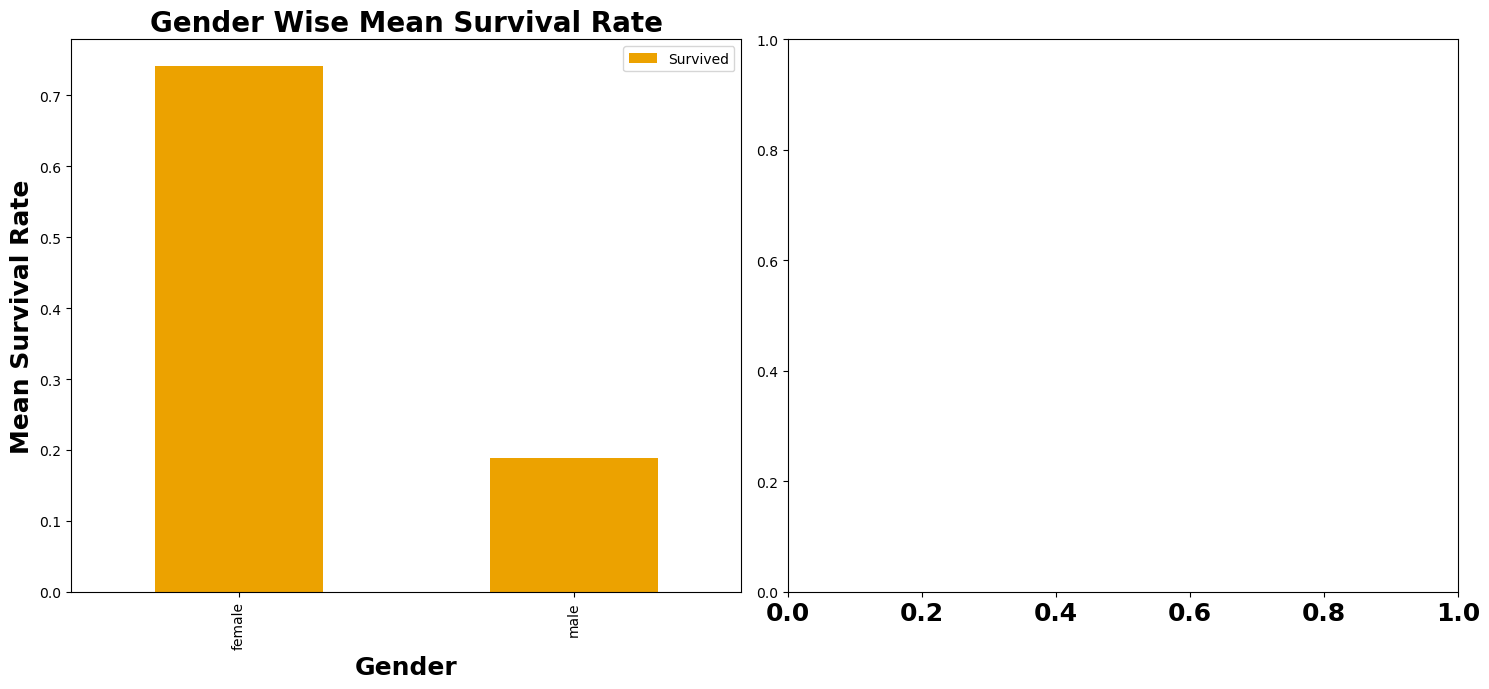

In [22]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
plt.xticks(fontsize=18,fontweight ='bold',rotation=0)
ax[0].set_title('Gender Wise Mean Survival Rate',fontsize=20,fontweight ='bold')

ax[0].set_xlabel("Gender",fontsize=18,fontweight ='bold')
ax[0].set_ylabel("Mean Survival Rate", fontsize= 18, fontweight='bold')
sns.countplot('Sex', hue='Survived', data=df,ax=ax[1])
ax[1].set_title('Gender-wise Survival Rate of Passengers ',fontsize=20,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Gender",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Survival Count", fontsize= 18, fontweight='bold')
plt.tight_layout()
plt.show()

In [23]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


TypeError: countplot() got multiple values for argument 'data'

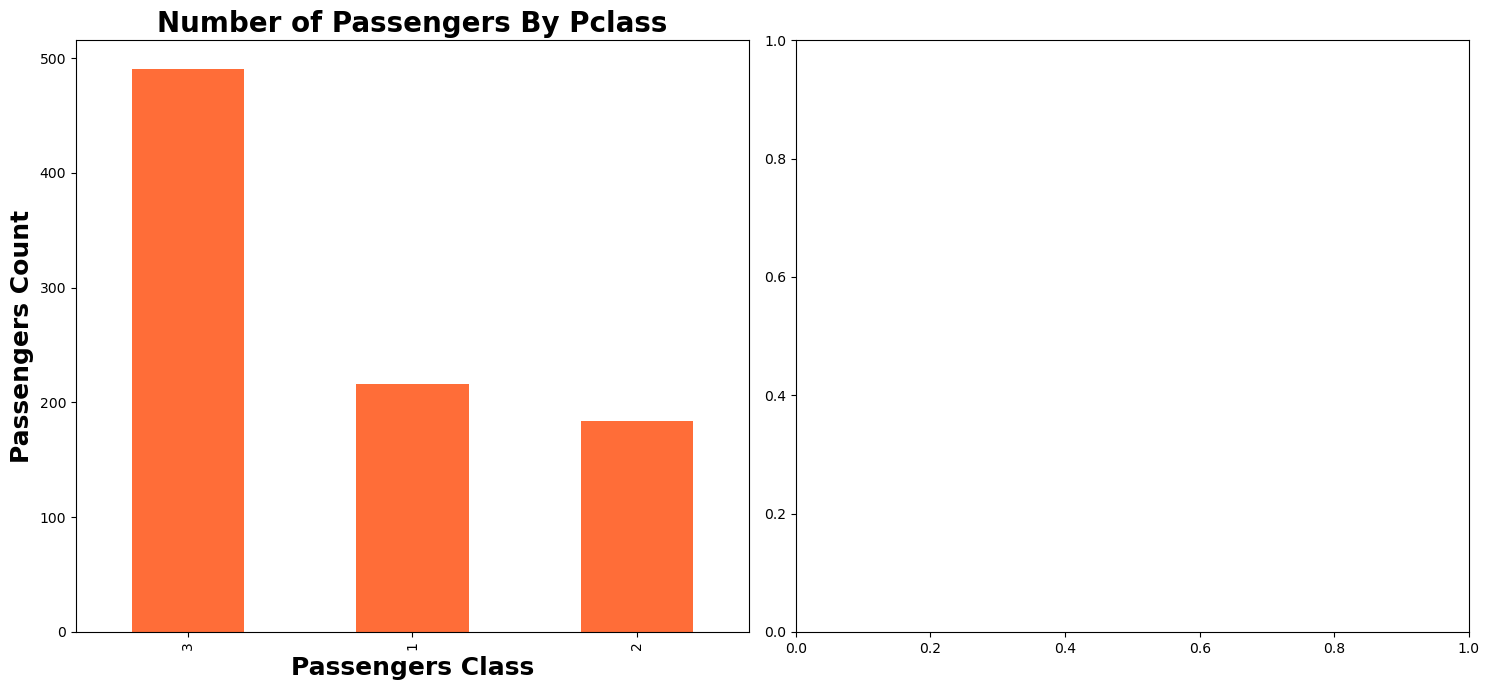

In [24]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', fontsize= 20, fontweight='bold')
ax[0].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[0].set_xlabel('Passengers Class', fontsize= 18, fontweight='bold')
sns.countplot('Pclass',hue='Survived', data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived Vs Dead', fontsize= 20, fontweight='bold')
ax[1].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[1].set_xlabel('Passengers Class', fontsize= 18, fontweight='bold')
plt.show()

In [25]:
pd.crosstab([df.Sex,df.Survived],df.Pclass, margins= True).style.background_gradient(cmap='summer_r')

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


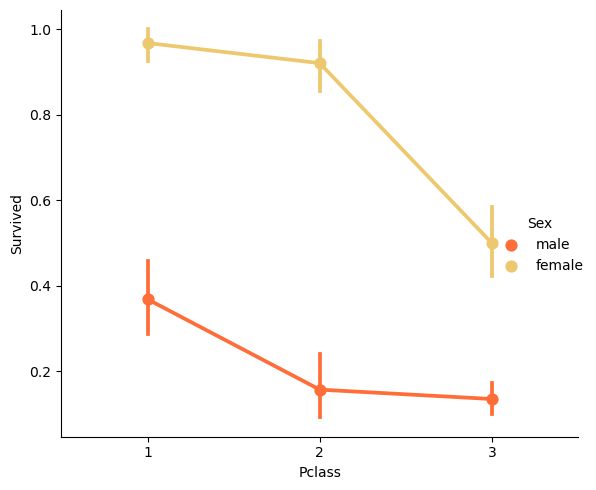

In [28]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point')
plt.show()


In [29]:
print('Oldest Passenger was of:',df['Age'].max(),'Years')
print('Youngest Passenger was of:',df['Age'].min(),'Years')
print('Average Age on th ship :',df['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on th ship : 29.69911764705882 Years


TypeError: violinplot() got multiple values for argument 'data'

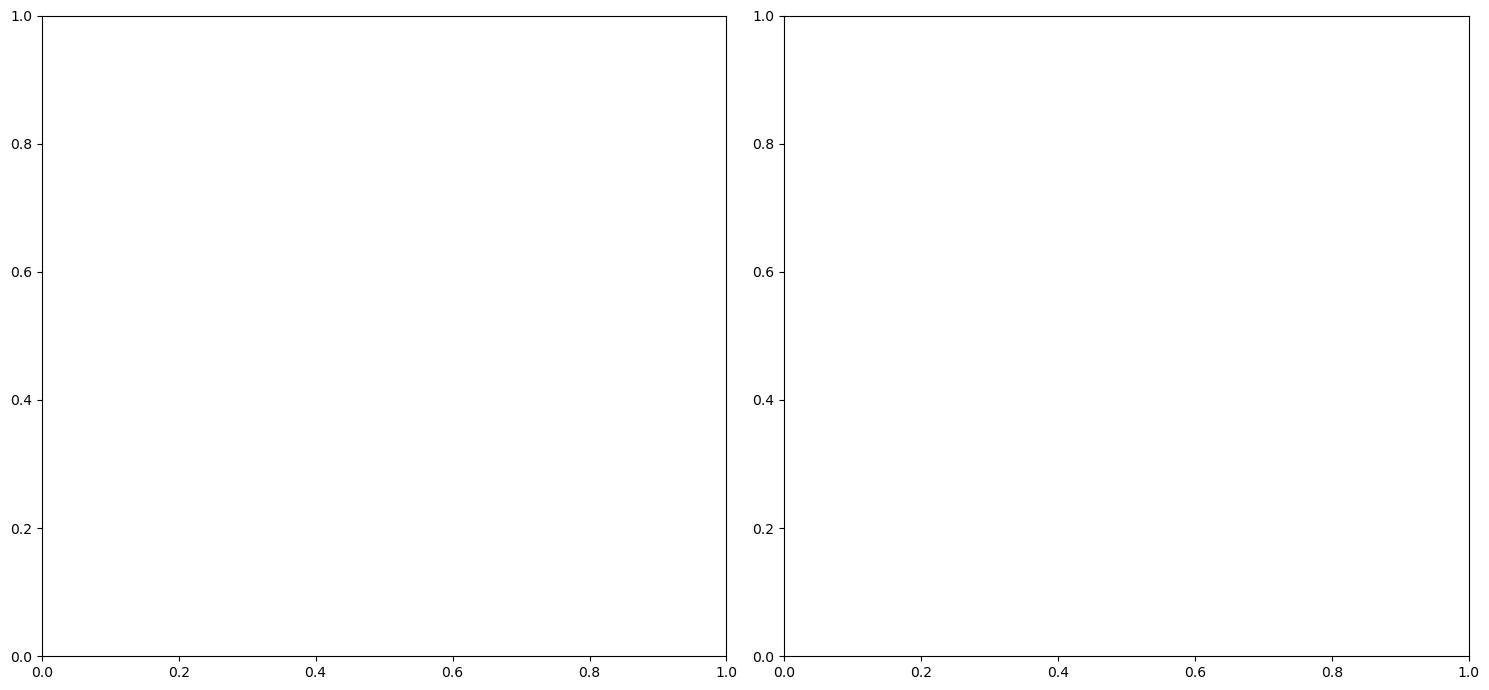

In [30]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.violinplot('Pclass','Age', hue='Survived', data=df, split=True, ax=ax[0])
ax[0].set_title('Pclass Wise Distribution of Age Vs Survived',fontsize= 20, fontweight='bold')
ax[0].set_yticks(range(0,110,10))
ax[0].set_ylabel('Passengers Age',fontsize= 18, fontweight='bold')
ax[0].set_xlabel('Passengers Class', fontsize= 18, fontweight='bold')
sns.violinplot('Sex','Age', hue='Survived',data=df, split= True, ax=ax[1])
ax[1].set_title('Gender-Wise Age Vs Survived',fontsize= 20, fontweight='bold')
ax[1].set_yticks(range(0,110,10))
ax[1].set_ylabel('Passengers Age',fontsize= 18, fontweight='bold')
ax[1].set_xlabel('Gender', fontsize= 18, fontweight='bold')
plt.show()

In [31]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract("([A-Za-z]+)\.") 


In [32]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [33]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [34]:
df.groupby('Initial')['Age'].mean()


Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [35]:
df.loc[(df.Age.isnull() & (df.Initial)=='Mr'), 'Age'].fillna(32.73,inplace = True)

In [36]:
df.loc[((df.Age.isnull())&(df.Initial)=='Mr'), 'Age']=32.73
df.loc[((df.Age.isnull())&(df.Initial)=='Mrs'), 'Age']=35.98
df.loc[((df.Age.isnull())&(df.Initial)=='Master'), 'Age']=4.57
df.loc[((df.Age.isnull())&(df.Initial)=='Miss'), 'Age']=21.86
df.loc[((df.Age.isnull())&(df.Initial)=='Other'), 'Age']=45.889

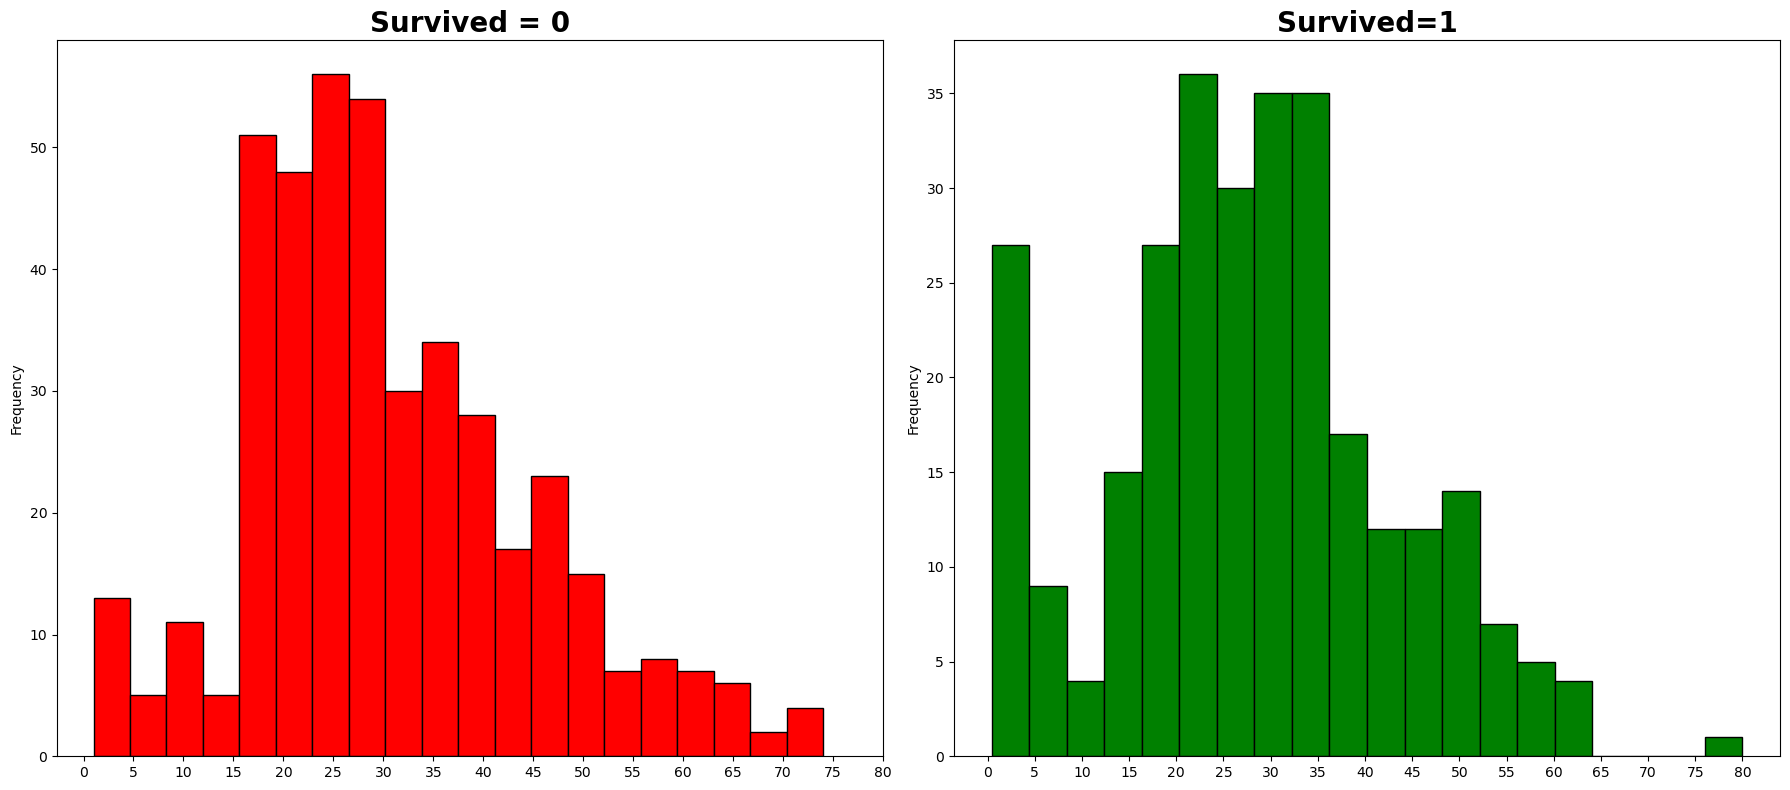

In [37]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0',fontsize= 20, fontweight='bold')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Survived=1',fontsize= 20, fontweight='bold')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

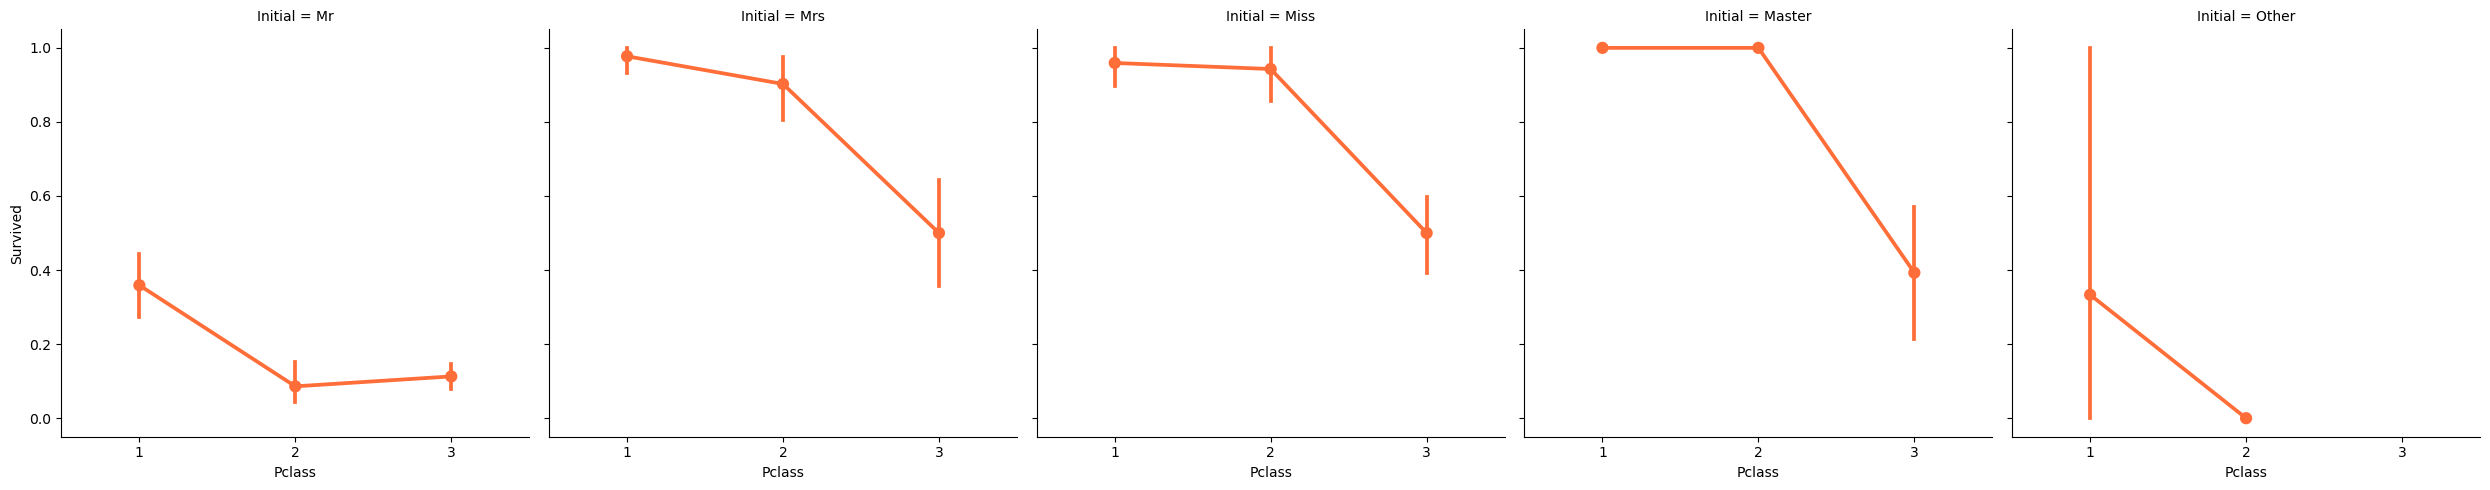

In [39]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=df, kind='point')
plt.tight_layout()
plt.show()

In [40]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')

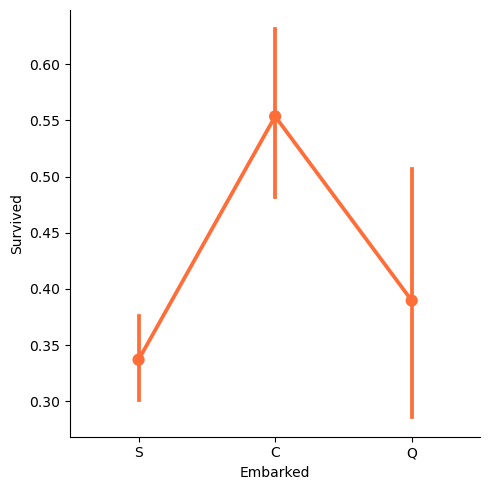

In [43]:
sns.catplot(x='Embarked', y='Survived', data=df, kind='point')
plt.show()

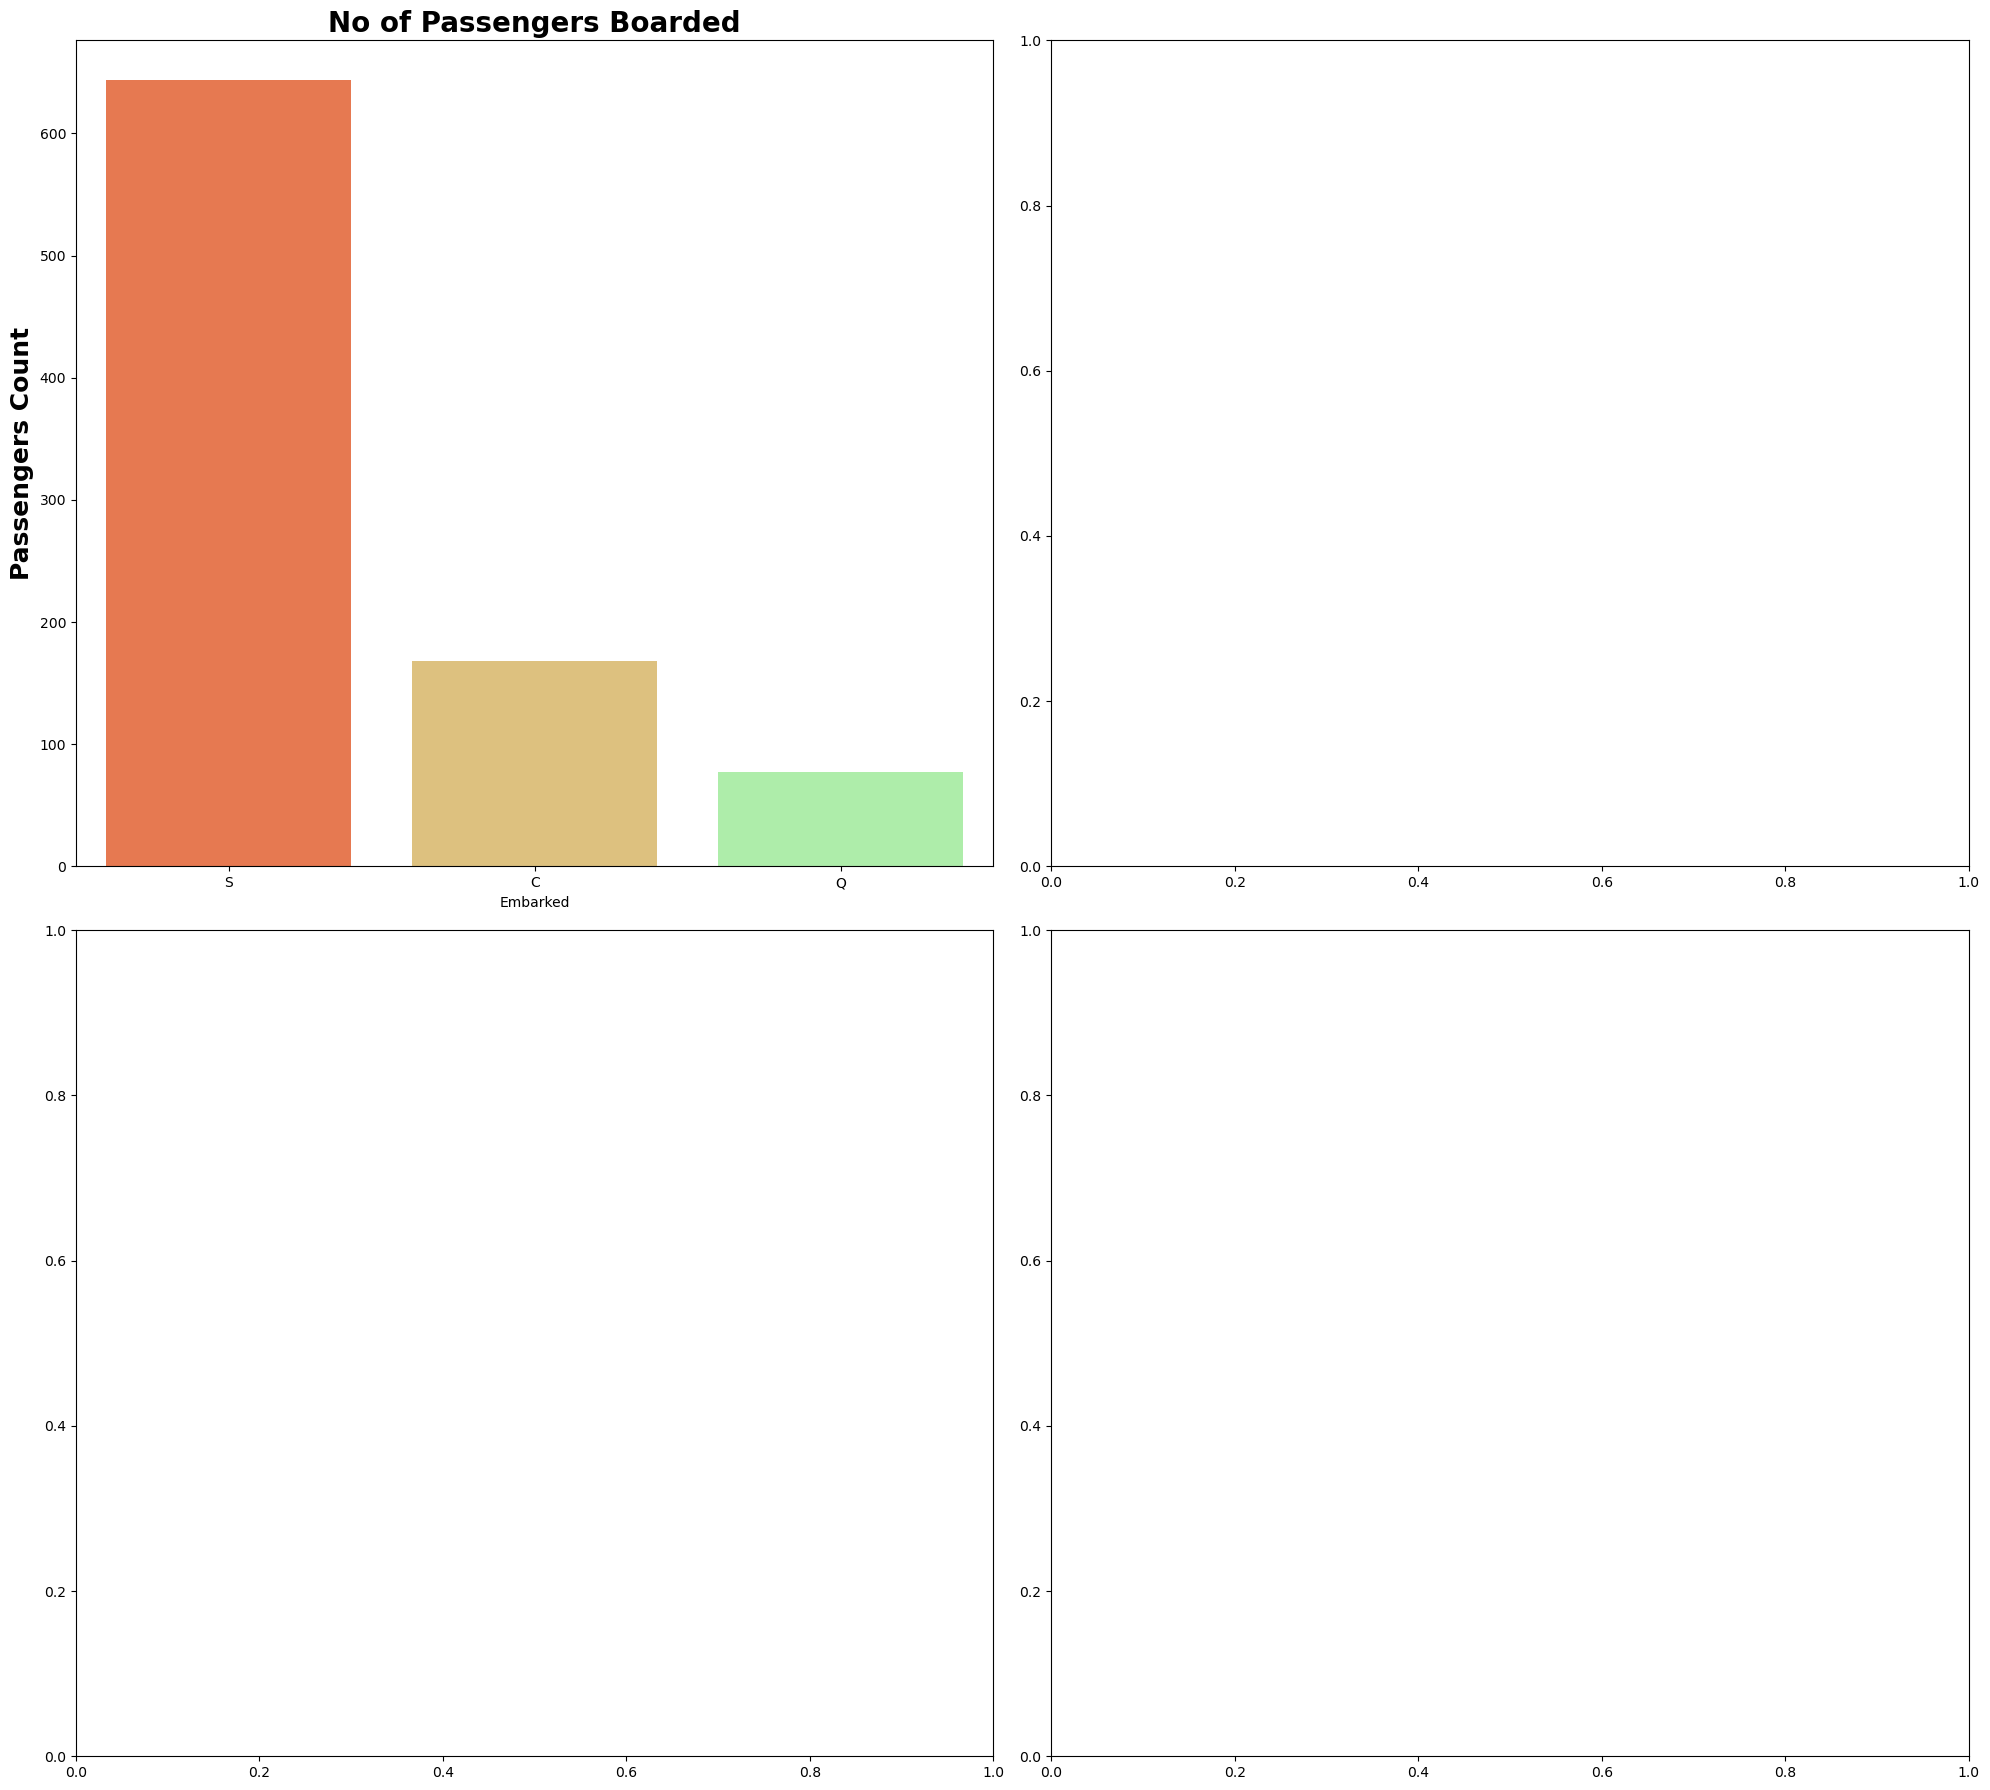

In [45]:
f, ax = plt.subplots(2, 2, figsize=(20, 18))

sns.countplot(x='Embarked', data=df, ax=ax[0, 0])
ax[0, 0].set_title('No of Passengers Boarded', fontsize=20, fontweight='bold')
ax[0, 0].set_ylabel('Passengers Count', fontsize=18, fontweight='bold')

plt.show()

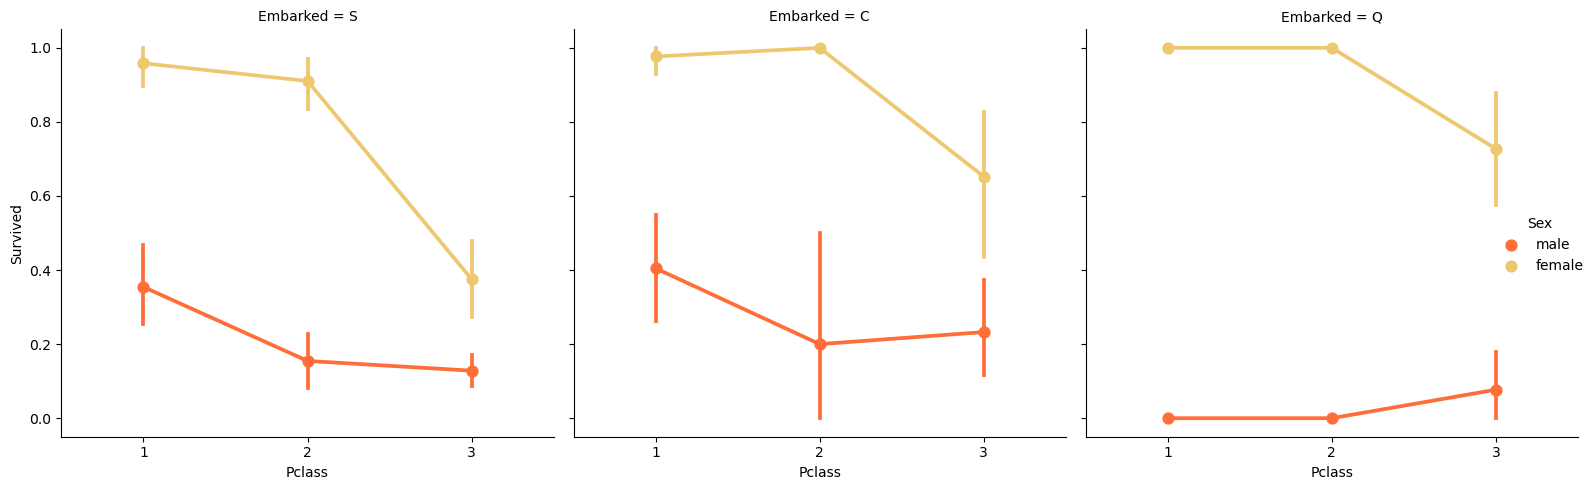

In [47]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=df, kind='point')
plt.show()


In [48]:
df['Embarked'].fillna('S', inplace=True)

In [49]:
df.Embarked.isnull().any()

False

In [50]:
pd.crosstab([df.SibSp],[df.Survived],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


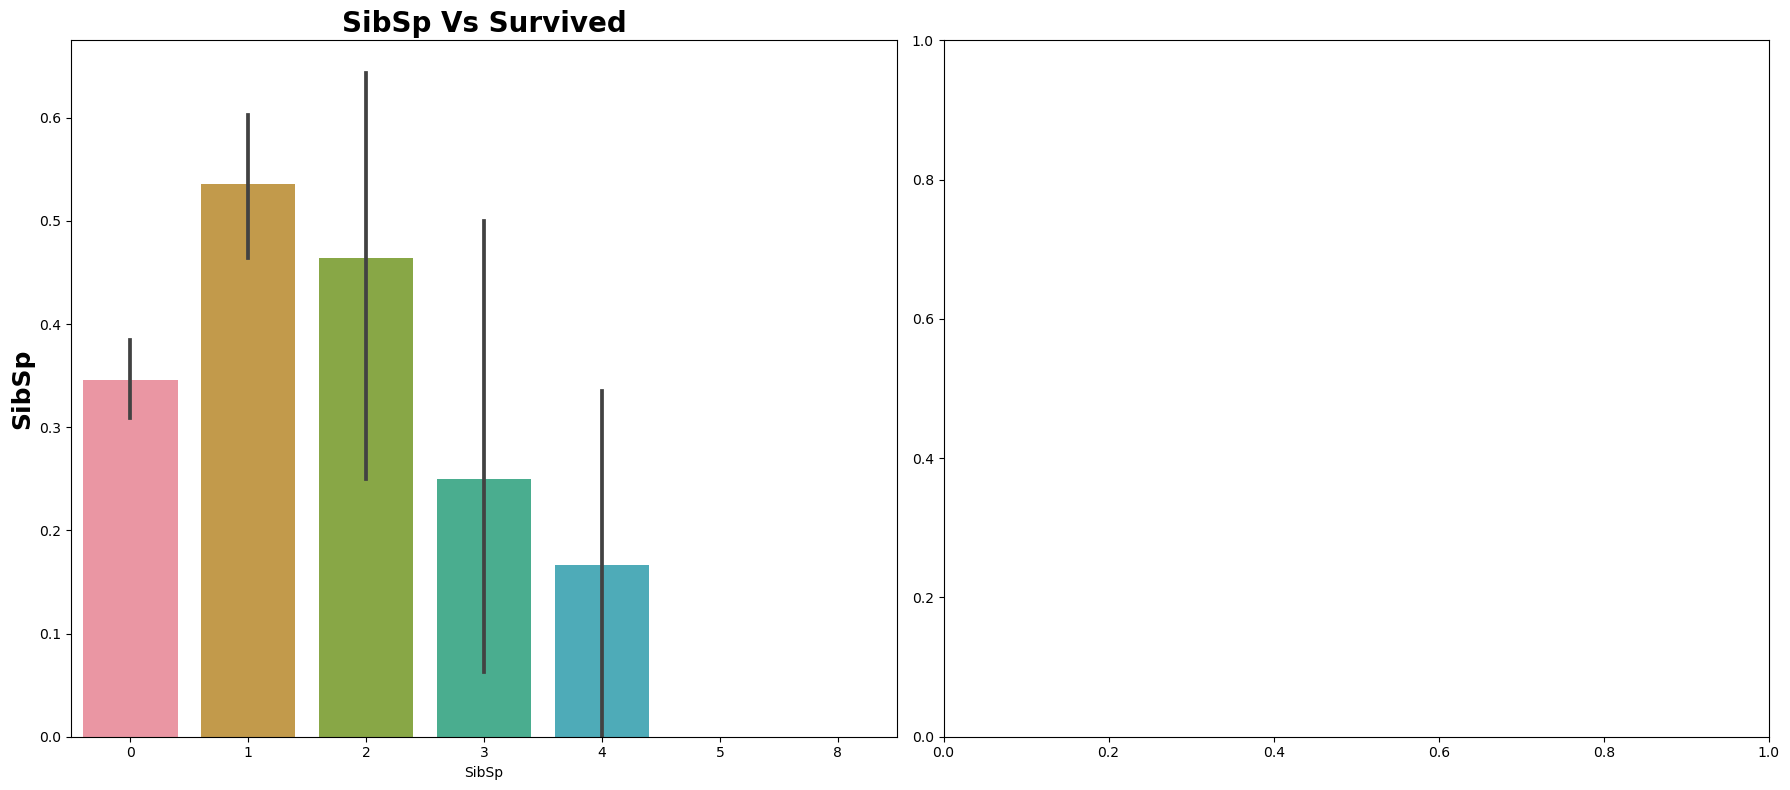

In [52]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))


sns.barplot(x='SibSp', y='Survived', data=df, ax=ax[0])
ax[0].set_title('SibSp Vs Survived', fontsize=20, fontweight='bold')
ax[0].set_ylabel('SibSp', fontsize=18, fontweight='bold')


plt.show()

In [53]:
pd.crosstab([df.SibSp],[df.Pclass],margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


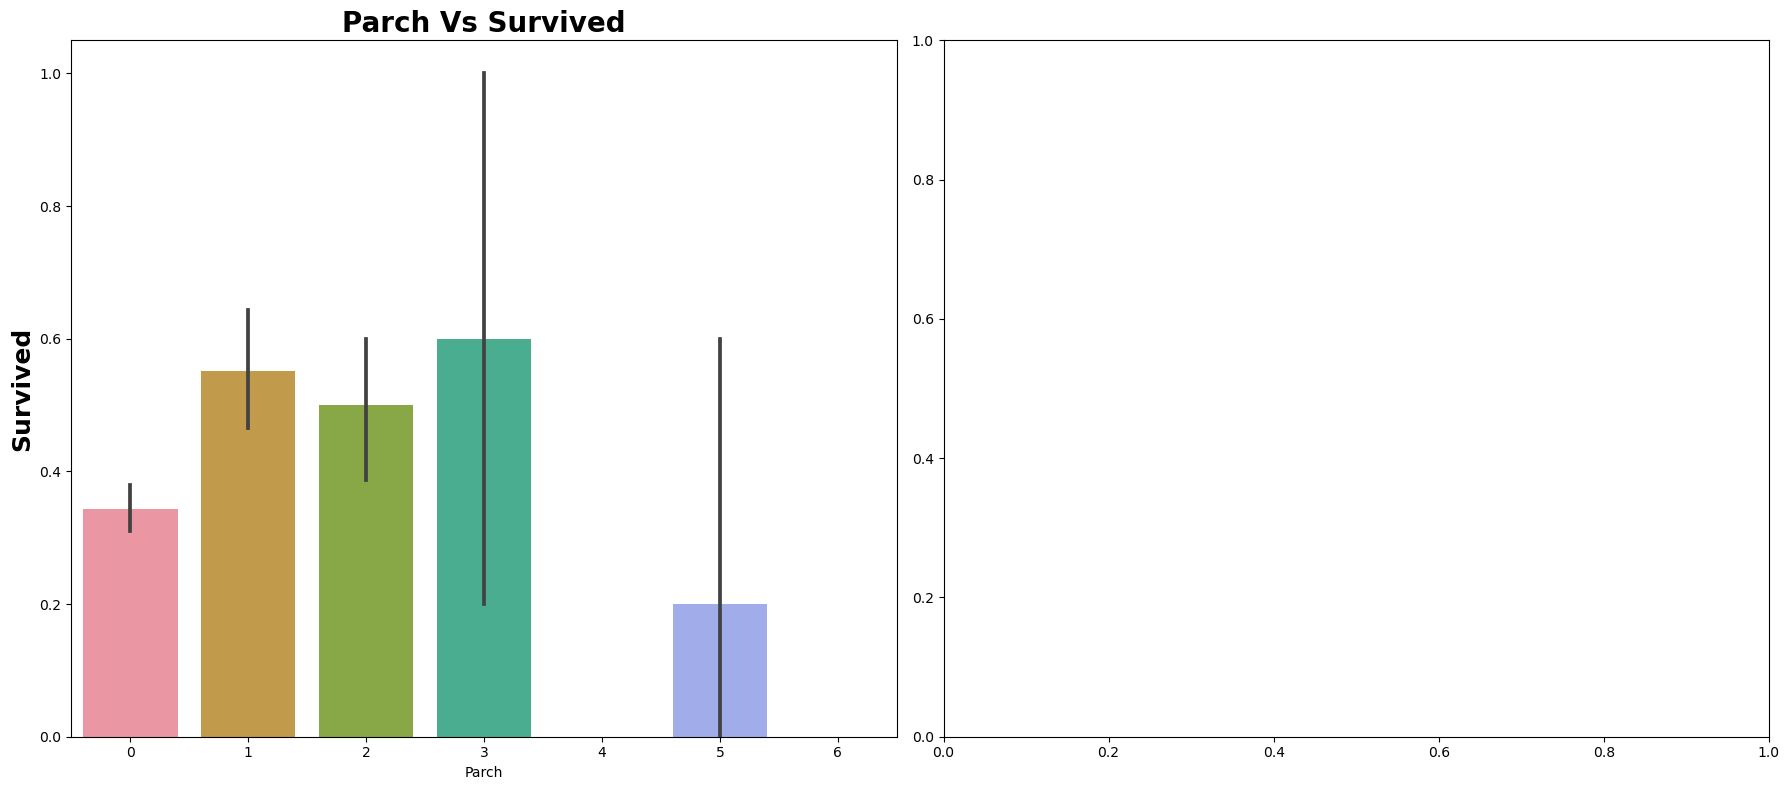

In [56]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))


sns.barplot(x='Parch', y='Survived', data=df, ax=ax[0])
ax[0].set_title('Parch Vs Survived', fontsize=20, fontweight='bold')
ax[0].set_ylabel('Survived', fontsize=18, fontweight='bold')


plt.show()

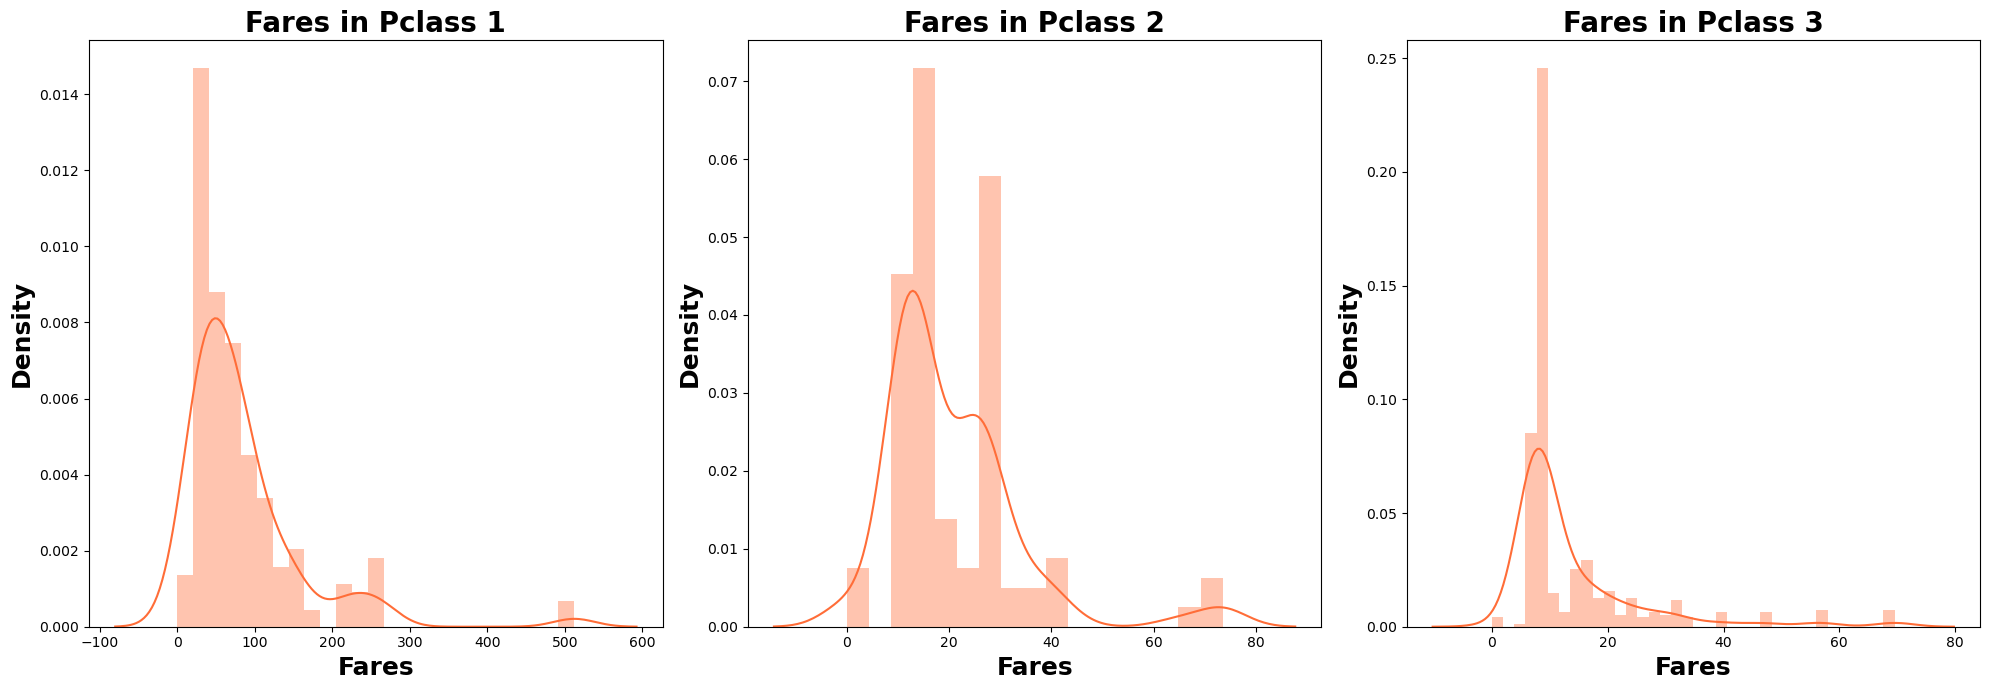

In [57]:
f,ax=plt.subplots(1,3,figsize=(20,7))
sns.distplot(df[df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1',fontsize= 20, fontweight='bold')
ax[0].set_ylabel('Density',fontsize= 18, fontweight='bold')
ax[0].set_xlabel('Fares', fontsize= 18, fontweight='bold')

sns.distplot(df[df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2',fontsize= 20, fontweight='bold')
ax[1].set_ylabel('Density',fontsize= 18, fontweight='bold')
ax[1].set_xlabel('Fares', fontsize= 18, fontweight='bold')

sns.distplot(df[df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3',fontsize= 20, fontweight='bold')
ax[2].set_ylabel('Density',fontsize= 18, fontweight='bold')
ax[2].set_xlabel('Fares', fontsize= 18, fontweight='bold')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


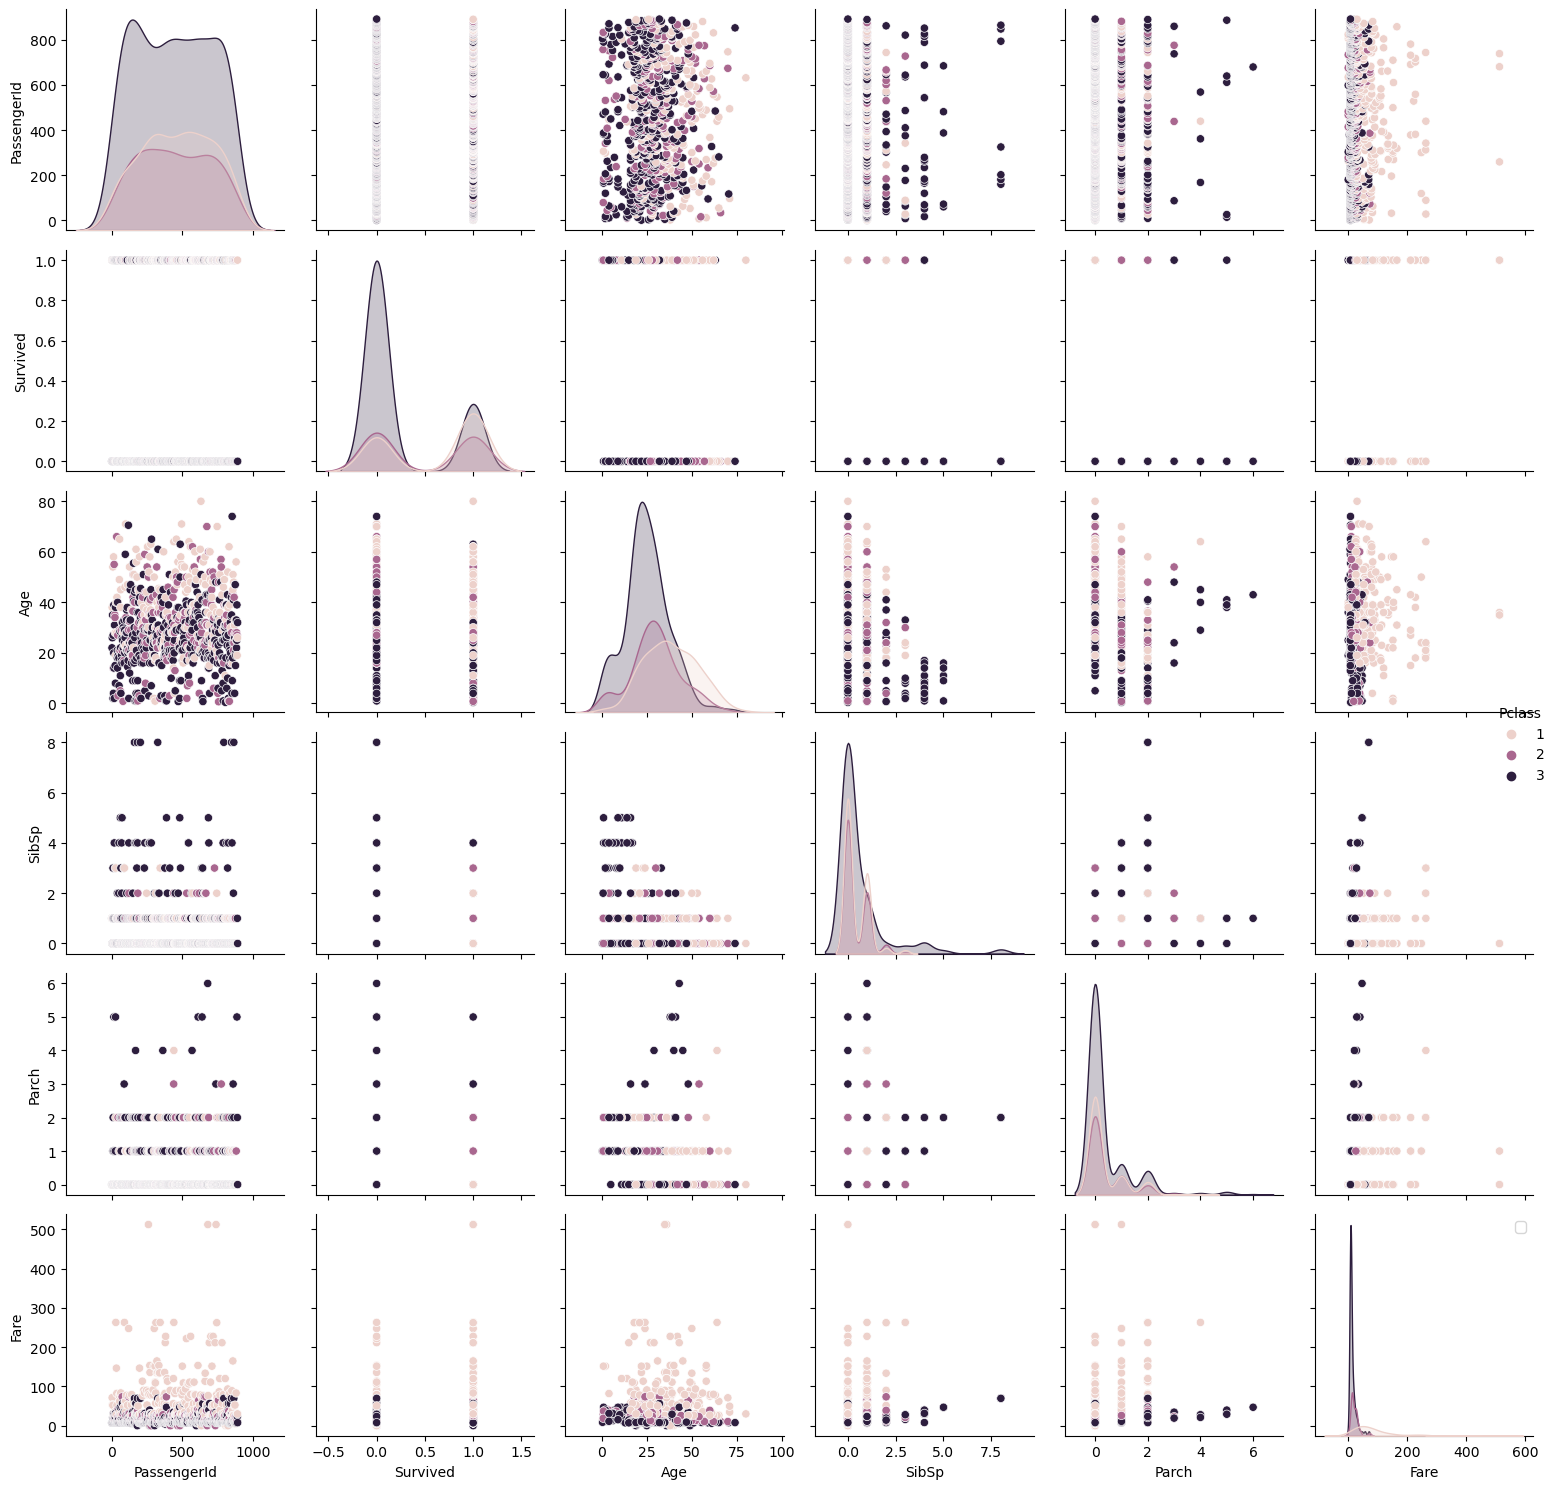

In [59]:
sns.pairplot(data=df, hue='Pclass')
plt.legend()
plt.show()

In [60]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


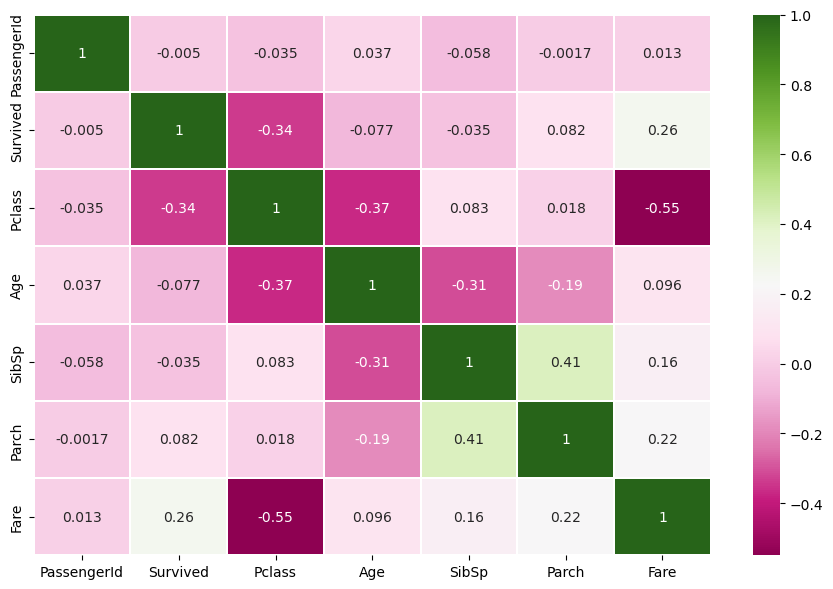

In [61]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot= True, cmap='PiYG',linewidths=0.3)
plt.show()